In [2]:
!pip install pandas librosa matplotlib seaborn


In [3]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Set correct path
dataset_path = "D:/cv-corpus-21.0-delta-2025-03-14/en"

# Paths to important things
clips_path = os.path.join(dataset_path, "clips")
tsv_path = os.path.join(dataset_path, "validated.tsv")

# Load the validated.tsv
df = pd.read_csv(tsv_path, sep='\t')

# Display first few rows
df.head()


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,116398939d6be70fc5fb532924a130c0adf286ac283499...,common_voice_en_41923025.mp3,f5a2a431746c5229ab696ba0e1a518fe7b26e208ff3b84...,"He was born at Wichenford, in Worcestershire, ...",NaN,2,0,thirties,NaN,United States English,NaN,en,NaN
1,24a4da2e8f053a45a0715849c222a40a4b0da9872efb2e...,common_voice_en_42356358.mp3,f6f009587d8812c147af1cc05079e1fcd8120c8a98cdf8...,The Portuguese division was overrun and withdr...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN
2,30849595699bc853c3810a78448acede46888b4e2d0809...,common_voice_en_42165090.mp3,f69afa5e77812e8be0085c874d2a9767323c78ffb43ba6...,Her health by this stage was also poor.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,42d53f34c1bc50f7a7c4ed1765a8d1ffeaf5cd441513cc...,common_voice_en_41921729.mp3,f5739acbefdbd3aac990792966fac4d40dcb39eb8dfa21...,His sporting interests outside of cricket incl...,NaN,2,0,nineties,NaN,England English,NaN,en,NaN
4,436b9e1f9da710d74eb01209f8f269bee70e93cadf2053...,common_voice_en_42528393.mp3,f7d35c60d76f025c45a9495757d1ee0e2b7c206317a288...,The following year he was elected to be part o...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN


In [5]:
# Total number of validated samples
num_samples = len(df)
print(f"Total number of validated audio samples: {num_samples}")
# Number of unique speakers
num_speakers = df['client_id'].nunique()
print(f"Number of unique speakers: {num_speakers}")
# Check if gender column exists
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    print("Gender distribution:")
    print(gender_counts)
else:
    print("No 'gender' column in this version of dataset.")

if 'accents' in df.columns:
    accents_counts = df['accents'].value_counts()
    print("Accent distribution:")
    print(accents_counts)
else:
    print("No 'Accent' column in this version of dataset.")


# List all columns
print("Columns in validated.tsv:")
print(df.columns.tolist())





Total number of validated audio samples: 249
Number of unique speakers: 47
Gender distribution:
gender
female_feminine       143
male_masculine         42
do_not_wish_to_say      9
Name: count, dtype: int64
Accent distribution:
accents
nigerian accent                                                          95
United States English                                                    81
Canadian English                                                         31
British English / Received Pronunciation (RP)                             6
United States English,Filipino                                            5
Lithuanian,Non-native                                                     5
England English                                                           4
Scottish English                                                          4
India and South Asia (India, Pakistan, Sri Lanka)                         4
L2                                                                        3
Unit

In [6]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
client_id            0
path                 0
sentence_id          0
sentence             0
sentence_domain    247
up_votes             0
down_votes           0
age                 12
gender              55
accents              5
variant            249
locale               0
segment            249
dtype: int64


In [7]:
# Check number of duplicate audio files
num_duplicates = df.duplicated(subset=['path']).sum()
print(f"Number of duplicate audio paths: {num_duplicates}")

# If any → remove them:
df = df.drop_duplicates(subset=['path'])
print(f"DataFrame shape after dropping duplicates: {df.shape}")


Number of duplicate audio paths: 0
DataFrame shape after dropping duplicates: (249, 13)


In [8]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_sentence'] = df['sentence'].apply(clean_text)

print(df[['sentence', 'clean_sentence']].head())


                                            sentence  \
0  He was born at Wichenford, in Worcestershire, ...   
1  The Portuguese division was overrun and withdr...   
2            Her health by this stage was also poor.   
3  His sporting interests outside of cricket incl...   
4  The following year he was elected to be part o...   

                                      clean_sentence  
0  he was born at wichenford in worcestershire an...  
1  the portuguese division was overrun and withdr...  
2             her health by this stage was also poor  
3  his sporting interests outside of cricket incl...  
4  the following year he was elected to be part o...  


In [9]:
# Filter out very short sentences (less than 2 words)
df = df[df['clean_sentence'].str.split().apply(len) >= 2]

# Check shape after filtering
print(f"DataFrame shape after filtering short sentences: {df.shape}")


DataFrame shape after filtering short sentences: (249, 14)


In [10]:
# Filter out very short sentences (less than 2 words)
df = df[df['clean_sentence'].str.split().apply(len) >= 2]

# Check shape after filtering
print(f"DataFrame shape after filtering short sentences: {df.shape}")




DataFrame shape after filtering short sentences: (249, 14)


In [11]:
print("Unique accents in dataset:")
print(df['accents'].dropna().unique())



Unique accents in dataset:
['United States English' 'England English'
 'Australian English,Canadian English' 'Scottish English'
 'India and South Asia (India, Pakistan, Sri Lanka)' 'Russian' 'Filipino'
 'Malaysian English'
 'United States English,Southern United States English,Lightly Southern'
 'L2' 'United States English,Filipino' 'Lithuanian,Non-native'
 'British English / Received Pronunciation (RP)' 'Canadian English'
 'nigerian accent']


In [12]:
#This piece of code breaks unqiue dataset accents into 2 so that each group has suffienct amount of dataset to learn . Two groups are Native and non Native

def map_accent(accent_str):
    if pd.isnull(accent_str):
        return 'Unknown'
    
    accent_str = accent_str.lower()

    native_keywords = ['united states', 'england', 'scottish', 'british', 'canadian', 'australian', 'southern']
    nonnative_keywords = ['india', 'south asia', 'filipino', 'malaysian', 'nigerian', 'l2', 'non-native', 'russian', 'lithuanian']
    
    native = any(word in accent_str for word in native_keywords)
    nonnative = any(word in accent_str for word in nonnative_keywords)

    if native and not nonnative:
        return 'Native'
    elif nonnative and not native:
        return 'Non-native'
    elif native and nonnative:
        return 'Mixed'
    else:
        return 'Other'

# Apply function
df['accent_group'] = df['accents'].apply(map_accent)

# Show distribution
print(df['accent_group'].value_counts())


accent_group
Native        129
Non-native    110
Unknown         5
Mixed           5
Name: count, dtype: int64


In [13]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
#librosa — loads audio & extracts MFCCs
#tqdm — shows progress bar while looping files

# Define your dataset root
dataset_path = "D:/cv-corpus-21.0-delta-2025-03-14/en"
clips_path = os.path.join(dataset_path, "clips")
tsv_path = os.path.join(dataset_path, "validated.tsv")

# Load metadata
df = pd.read_csv(tsv_path, sep="\t")

# Filter missing or short data
df = df[df['sentence'].notnull()]
df = df[df['sentence'].str.strip() != '']

# Apply the accent grouping logic here if not done already
# df['accent_group'] = df['accents'].apply(map_accent)  ← from earlier step



In [14]:
#feeding data into standard ML classifiers
def extract_mfcc(file_path, n_mfcc=13, sr=16000):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc.T, axis=0)  # Average across time axis
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [15]:
df['accent_group'] = df['accents'].apply(map_accent)

# Keep only rows with accent_group
df = df[df['accent_group'].notnull()]

features = []
labels = []

print("Extracting MFCCs from audio clips...")

for index, row in tqdm(df.iterrows(), total=len(df)):
    file_name = row['path']
    file_path = os.path.join(clips_path, file_name)
    
    mfcc = extract_mfcc(file_path)
    if mfcc is not None:
        features.append(mfcc)
        labels.append(row['accent_group'])

# Convert to arrays
X = np.array(features)
y = np.array(labels)

print("Finished! Shape of feature matrix:", X.shape)
print("Number of labels:", len(y))


Extracting MFCCs from audio clips...


100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:07<00:00, 34.77it/s]

Finished! Shape of feature matrix: (249, 13)
Number of labels: 249


In [16]:
# Save as .npy files for quick reload later
np.save("mfcc_features.npy", X)
np.save("mfcc_labels.npy", y)


In [17]:
#Implementiong Models , Logistic regression :

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
# Load features (if not already in memory)
X = np.load("mfcc_features.npy")
y = np.load("mfcc_labels.npy")

# Encode string labels to numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., Native → 1, Non-native → 0

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalize features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Test Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

       Mixed       0.50      1.00      0.67         1
      Native       0.79      0.85      0.81        26
  Non-native       0.79      0.68      0.73        22
     Unknown       0.00      0.00      0.00         1

    accuracy                           0.76        50
   macro avg       0.52      0.63      0.55        50
weighted avg       0.77      0.76      0.76        50



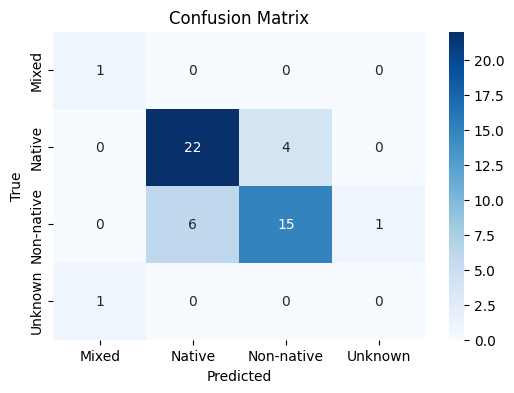

In [21]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [22]:
test_audio_path = 'Recording2.wav'  # or provide full path if needed

# Function to extract averaged MFCCs (same as during training)
def extract_mfcc_for_test(file_path, n_mfcc=13, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)  # Average over time
    return mfcc_mean.reshape(1, -1)      # Reshape for model input

In [23]:
# Extract and scale features
test_features = extract_mfcc_for_test(test_audio_path)
test_features_scaled = scaler.transform(test_features)  # use the same scaler from training

# Predict using the trained model
prediction = model.predict(test_features_scaled)

# Decode prediction back to original label
predicted_accent_group = le.inverse_transform(prediction)[0]
print(f"Predicted Accent Group: {predicted_accent_group}")


Predicted Accent Group: Non-native


In [24]:
#Applying CNN
import os
import librosa
import numpy as np
from tqdm import tqdm

def extract_mfcc_2d(file_path, n_mfcc=40, sr=16000, max_len=100):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        
        # Pad or trim to fixed length (for CNN input)
        if mfcc.shape[1] < max_len:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]
        
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [25]:
mfcc_2d_list = []
label_list = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    file_name = row['path']
    file_path = os.path.join(clips_path, file_name)
    mfcc_2d = extract_mfcc_2d(file_path)
    if mfcc_2d is not None:
        mfcc_2d_list.append(mfcc_2d)
        label_list.append(row['accent_group'])

X_cnn = np.array(mfcc_2d_list)
y_cnn = np.array(label_list)

# Reshape for CNN: (samples, height, width, channels)
X_cnn = X_cnn[..., np.newaxis]
print("Shape of X for CNN:", X_cnn.shape)


100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:02<00:00, 94.06it/s]

Shape of X for CNN: (249, 40, 100, 1)


In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le_cnn = LabelEncoder()
y_cnn_encoded = le_cnn.fit_transform(y_cnn)
y_cnn_cat = to_categorical(y_cnn_encoded)



In [27]:
from sklearn.model_selection import train_test_split

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y_cnn_cat, test_size=0.2, random_state=42, stratify=y_cnn_cat)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 100, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_cnn_cat.shape[1], activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()


C:\Users\HF\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         753,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,804 (2.95 MB)

 Trainable params: 772,804 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model_cnn.fit(
    X_train_cnn, y_train_cnn,
    epochs=20,
    batch_size=16,
    validation_data=(X_test_cnn, y_test_cnn)
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4335 - loss: 11.7473 - val_accuracy: 0.6800 - val_loss: 0.7683
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6151 - loss: 0.8560 - val_accuracy: 0.6400 - val_loss: 0.7037
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7934 - loss: 0.4697 - val_accuracy: 0.7800 - val_loss: 0.4773
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8968 - loss: 0.3448 - val_accuracy: 0.8000 - val_loss: 0.4051
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9237 - loss: 0.2140 - val_accuracy: 0.8200 - val_loss: 0.4221
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9520 - loss: 0.2180 - val_accuracy: 0.7800 - val_loss: 0.4381
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9790 - loss: 0.0654 - val_accuracy: 0.8000 - val_loss: 0.4671
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0227 - val_accuracy: 0.8000 - 

In [30]:
import librosa
import numpy as np

def extract_mfcc_for_cnn(file_path, n_mfcc=40, sr=16000, max_len=100):
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Pad or truncate
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    
    # Reshape to CNN input shape: (1, 40, 100, 1)
    mfcc = mfcc.reshape(1, n_mfcc, max_len, 1)
    return mfcc


In [31]:
# Set path to your test file
test_audio_path = 'Recording2.wav'  # or another .wav file you want to test

# Extract features and predict
test_mfcc = extract_mfcc_for_cnn(test_audio_path)
cnn_prediction = model_cnn.predict(test_mfcc)

# Decode predicted class
predicted_class_index = np.argmax(cnn_prediction, axis=1)
predicted_label = le_cnn.inverse_transform(predicted_class_index)[0]

print(f"Predicted Accent Group (CNN): {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Accent Group (CNN): Native
